BIG DATA: Pré-processamento de Dados

Download Dados Bolsa Família (recomendação: faça a transferência pelo menos dos últimos 6 meses)

Fonte: https://portaldatransparencia.gov.br/download-de-dados/novo-bolsa-familia

Após essa etapa, concatene em um dataframe 2 meses aleatórios dessa fonte (mês a mês).

Vamos comparar o tempo de processamento das bibliotecas Pandas e Polars:

PANDAS

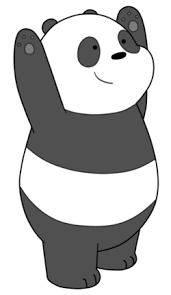

In [2]:
#IMPORTANTE: utilize os dados de 2 meses para evitar a sobrecarga do programa!

import pandas as pd
import time

In [3]:
arquivo1=pd.read_csv("202401_NovoBolsaFamilia.csv", sep=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pd.read_csv("202402_NovoBolsaFamilia.csv", sep=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_pandas=pd.concat([arquivo1,arquivo2])

display(df_pandas.head())

print("Tempo de execução com Pandas:", time.time() - inicio_tempo, "segundos") 

POLARS


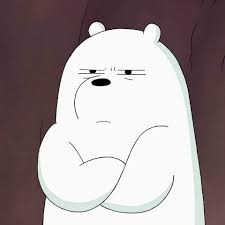

In [4]:
import polars as pl

In [5]:
arquivo1=pl.read_csv("202401_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202402_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202401,202303,"""AC""",139,"""RIO BRANCO""","""***.511.972-**""",16291115205,"""JANAINA FERREIRA DA SILVA""","""800,00"""
202401,202303,"""BA""",3329,"""ANGUERA""","""***.909.745-**""",20474429886,"""TACIANE MARQUES DA SILVA""","""750,00"""
202401,202303,"""BA""",3731,"""MONTE SANTO""","""***.872.338-**""",20195376298,"""MAILSON DOS SANTOS SILVA""","""650,00"""
202401,202303,"""BA""",3761,"""NOVA VICOSA""","""***.665.905-**""",12723589082,"""IRENI RICARDO GERALDO""","""650,00"""
202401,202303,"""BA""",3849,"""SALVADOR""","""***.932.435-**""",20024584007,"""ELIENE GOMES DOS SANTOS""","""850,00"""


Tempo de execução com Polars: 0.03400063514709473 segundos


In [6]:
#Exportação para .parquet com Pandas:

inicio_tempo=time.time()
parquet1=df_pandas.to_parquet=("202401_NovoBolsaFamilia_pandas.parquet")
print("Tempo de exportação com Pandas:", time.time() - inicio_tempo, "segundos")
print(parquet1)

Tempo de exportação com Pandas: 0.0 segundos
202401_NovoBolsaFamilia_pandas.parquet


In [7]:
#Exportação para .parquet com Polars:

inicio_tempo=time.time()
parquet2=df_polars.write_parquet=("202401_NovoBolsaFamilia_polars.parquet")
print("Tempo de exportação com Polars:", time.time() - inicio_tempo, "segundos") 
print(parquet2)

Tempo de exportação com Polars: 0.0009996891021728516 segundos
202401_NovoBolsaFamilia_polars.parquet


In [2]:
import pyarrow #não esqueça de instalar pip install pyarrow pandas
import fastparquet #não esqueça de instalar pip install fastparquet pandas

In [1]:
arquivo1=pl.read_csv("202401_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202402_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

NameError: name 'pl' is not defined

In [17]:
df_polars.write_parquet('bimestre1.parquet')

In [18]:
arquivo1=pl.read_csv("202403_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202404_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202403,202303,"""PA""",581,"""CURIONOPOLIS""","""***.427.552-**""",16158471934,"""ANDRESSA SOUSA COSTA""","""325,00"""
202403,202303,"""PA""",581,"""CURIONOPOLIS""","""***.268.842-**""",21204955249,"""DIVINA NERES DA SILVA""","""350,00"""
202403,202304,"""AM""",221,"""CARAUARI""","""***.462.652-**""",20149917044,"""ELIAS GREGORIO SIMOES""","""600,00"""
202403,202304,"""BA""",3449,"""CATU""","""***.335.635-**""",16104664114,"""ADRIANA MIRANDA DE JESUS""","""800,00"""
202403,202304,"""BA""",3449,"""CATU""","""***.288.245-**""",12611273067,"""EDMILSON DE JESUS MENDES""","""600,00"""


Tempo de execução com Polars: 2.5130560398101807 segundos


In [19]:
df_polars.write_parquet('bimestre2.parquet')

In [20]:
arquivo1=pl.read_csv("202405_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202406_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202405,202303,"""RJ""",6001,"""RIO DE JANEIRO""","""""",12789600971,"""DYANNA MARIA DA SILVA RABELO""","""750,00"""
202405,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""***.520.517-**""",16662994112,"""RIVICA SOARES BARBOSA""","""750,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""***.554.805-**""",20740034450,"""ANDREA PEREIRA DOS SANTOS""","""350,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""***.332.675-**""",16014198572,"""DINALVA DA CRUZ""","""300,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""""",20724192861,"""REGIANE JESUS DO ESPIRITO SANT…","""325,00"""


Tempo de execução com Polars: 2.0376884937286377 segundos


In [21]:
df_polars.write_parquet('bimestre3.parquet')

In [22]:
#ARQUIVO FINAL
parquet1=pl.read_parquet('bimestre1.parquet')
parquet2=pl.read_parquet('bimestre2.parquet')
parquet3=pl.read_parquet('bimestre3.parquet')

bolsa_familia=pl.concat([parquet1,parquet2,parquet3])
bolsa_familia.write_parquet('bolsa_familia_final.parquet')

**LAZY EVALUATION:**
    Otimiza o processamento dos dados volumosos, adiando operações até momentos que realmente são necessários.

In [1]:
#Carregando o arquivo parquet através do Lazy Evaluation:
df_lazy=pl.scan_parquet('bolsa_familia_final.parquet')

#Definindo as operações que serão executadas apenas em momentos oportunos:
resultado=(df_lazy.filter(pl.col("NOME MUNICÍPIO")=="RIO DE JANEIRO").collect())

display(resultado)

NameError: name 'pl' is not defined

In [5]:
display(resultado)

NameError: name 'resultado' is not defined

Monitoramento de Recursos:

A biblioteca psutil permite verificar condições como consumo de memória e CPU.

In [1]:
import psutil

processo=psutil.Process()
print('Uso de CPU:', processo.cpu_percent(),'%')
print('Uso de Memória:',processo.memory_info().rss/(1024**2),'MB')

Uso de CPU: 0.0 %
Uso de Memória: 13.203125 MB
